## DT(Decision tree)

> #### Decision trees, like a tree, use leaf nodes to classify and predict.

> ### Information entropy
> > Information entropy is used to describe the amount of information contained in a data set.The goal of decision tree is to reduce information entropy.
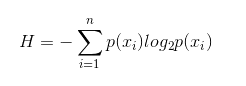

> ### How to choose leaf nodes(features):
> > After traversing all the features and using each feature as a node to segment the data set, we calculate the change range of the information entropy of the data set before and after segmentation. We choose the leaf node with the greatest change.
> > The change of information entropy is called __information gain__.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def entropy(px):
    return - (px * np.log2(px))

x = np.linspace(0.01, 1, 100)
plt.figure(figsize=(5, 3), dpi=200)
plt.title('$Entropy(x) = - P(x) * log_2(P(x))$')
plt.xlim(0, 1)
plt.ylim(0, 0.6)
plt.xlabel('P(x)')
plt.ylabel('Entropy')
plt.plot(x, entropy(x), 'r-');

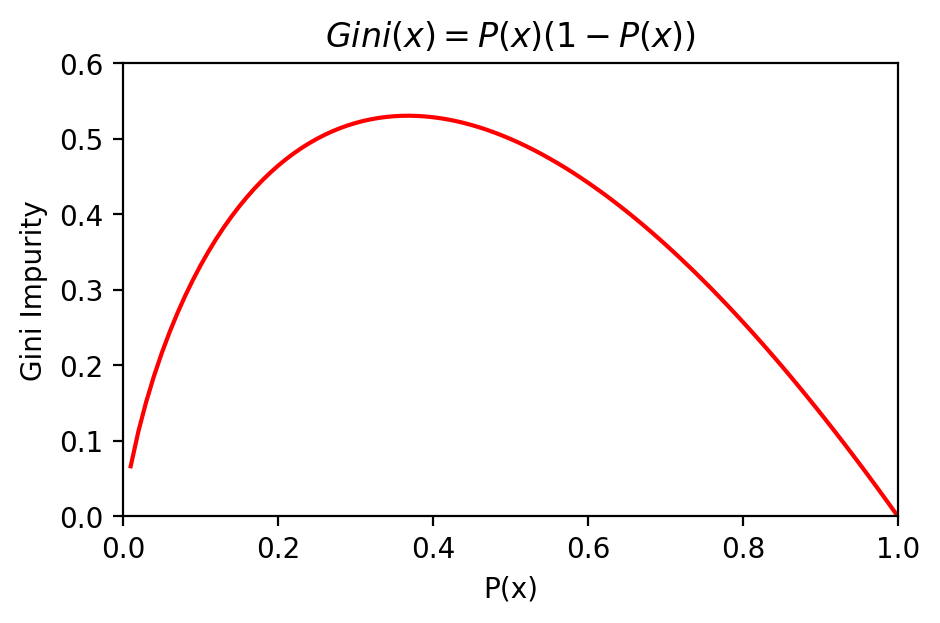

In [2]:
def gini_impurity(px):
    return px * (1 - px)

x = np.linspace(0.01, 1, 100)
plt.figure(figsize=(5, 3), dpi=200)
plt.title('$Gini(x) = P(x) (1 - P(x))$')
plt.xlim(0, 1)
plt.ylim(0, 0.6)
plt.xlabel('P(x)')
plt.ylabel('Gini Impurity')
plt.plot(x, entropy(x), 'r-');

## Classification And Regression Tree
> Decision tree generated by CART algorithm is a simple two binary tree. Because CART algorithm is a binary tree, it can only be "yes" or "no" in every step of decision-making. Even if a feature has multiple values, it divides the data into two parts. 

In [3]:
import pandas as pd
def read_dataset(fname):
    data = pd.read_csv(fname, index_col=0) 
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    data = data.fillna(0)
    return data

train = read_dataset('datasets/titanic/train.csv')

In [4]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [5]:
from sklearn.model_selection import train_test_split

y = train['Survived'].values
X = train.drop(['Survived'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape))

train dataset: (712, 7); test dataset: (179, 7)


In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))
print(clf)

train score: 0.9873595505617978; test score: 0.7374301675977654
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


best param: 3; best score: 0.7932960893854749


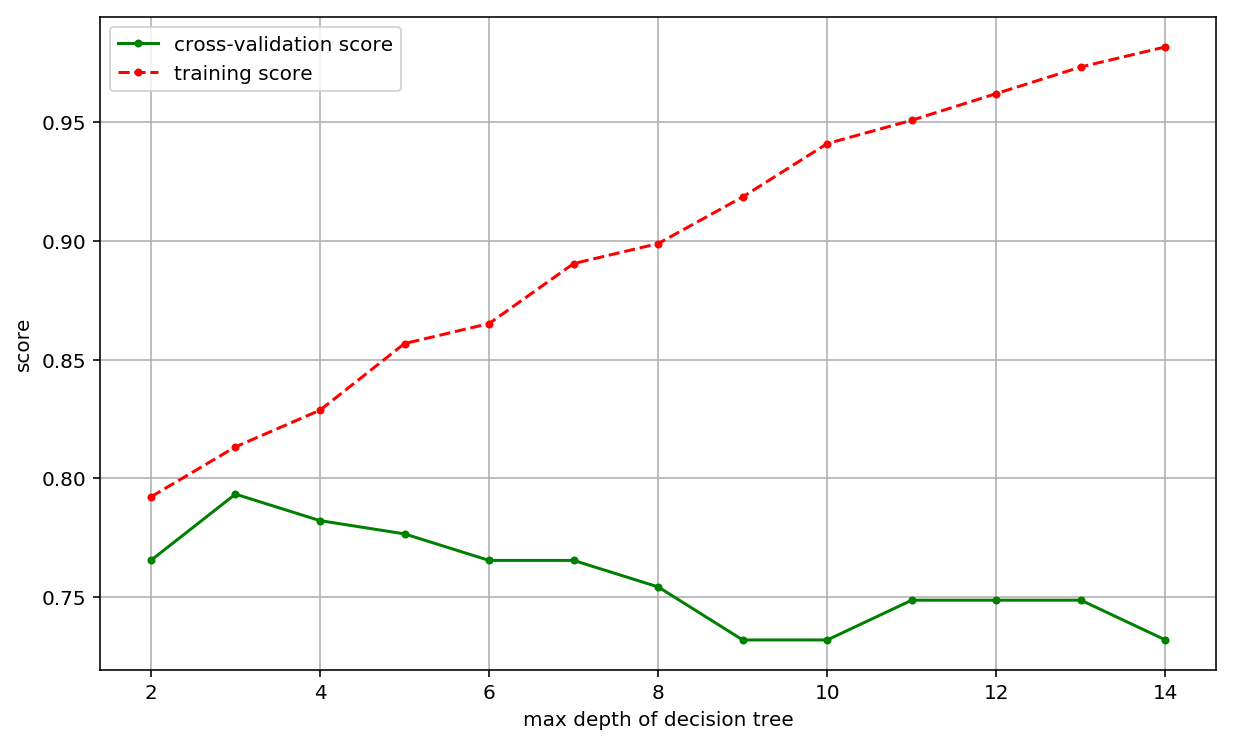

In [9]:
##Choose the best depth.
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

best param: 0.0015306122448979593; best score: 0.8379888268156425


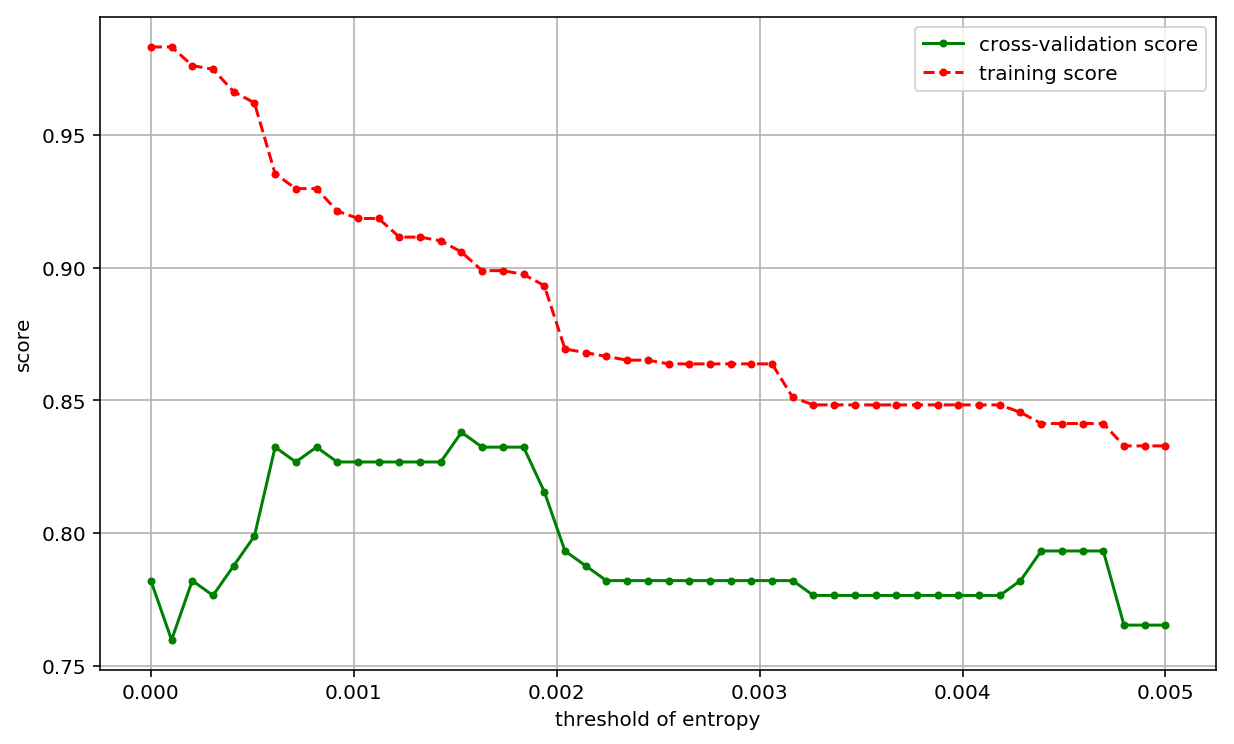

In [18]:
## Select the best segmentation value.
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)


values = np.linspace(0, 0.005, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]


best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))


plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [19]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

best param: {'min_impurity_decrease': 0.0010204081632653062}
best score: 0.813692480359147


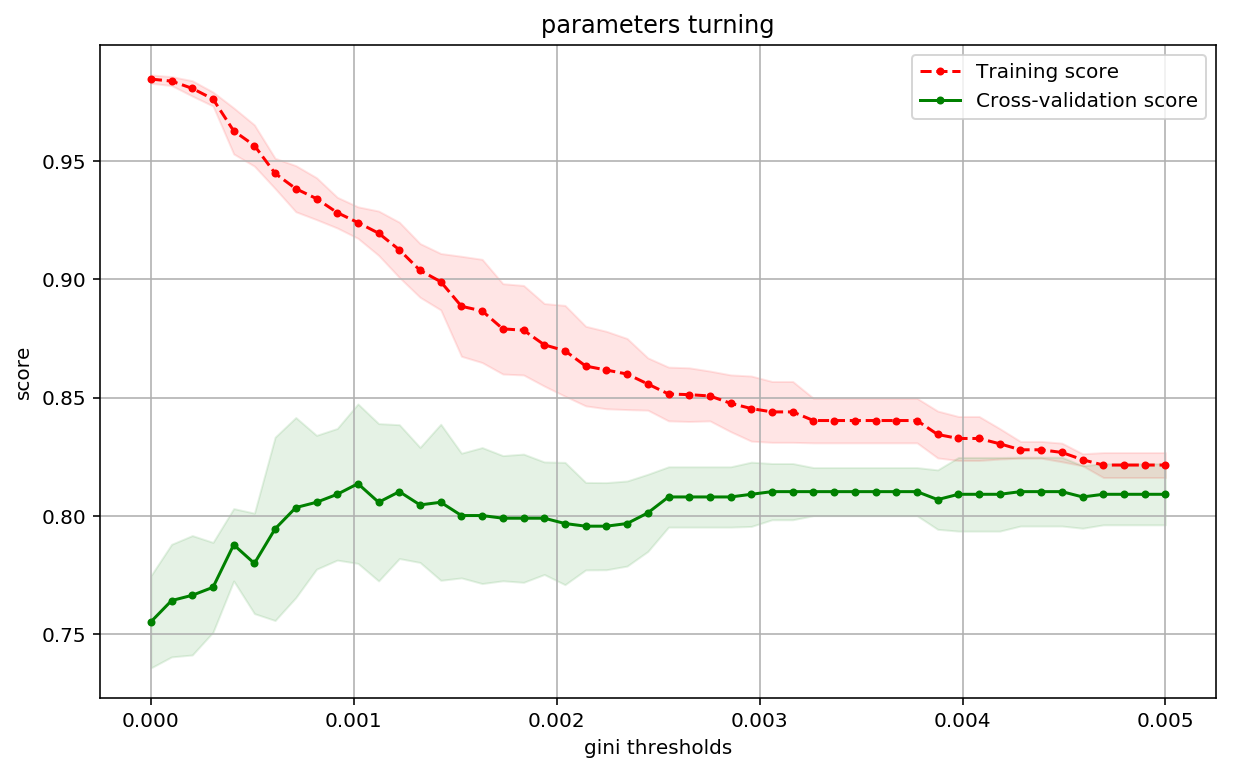

In [20]:
# Model parameter selection Toolkit
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.005, 50)
# Set the parameters by cross-validation
param_grid = {'min_impurity_decrease': thresholds}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [21]:
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 0.01, 50)
gini_thresholds = np.linspace(0, 0.005, 50)

# Set the parameters by cross-validation
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_decrease': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_decrease': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

best param: {'criterion': 'entropy', 'min_impurity_decrease': 0.002857142857142857}
best score: 0.8226711560044894


## Advantage:
> * The calculation is simple, easy to understand and interpretable.
> * It is more suitable for dealing with samples with missing attributes.
> * Able to handle irrelevant features.
> * In a relatively short period of time, it can make feasible and effective results for large data sources.

## Disadvantage:
> * Overfitting.
> * The correlation between data is ignored.
> * For data with inconsistent sample sizes, the results of information gain in decision tree tend to those features with more values.